<a href="https://colab.research.google.com/github/Ahmed-ElGammaz/data-science/blob/master/ANN_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_black = pd.read_csv("/content/black-friday.csv")
df_black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
22889,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
22890,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
22891,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
22892,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
df_black.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     22894 non-null  int64  
 1   Product_ID                  22894 non-null  object 
 2   Gender                      22894 non-null  object 
 3   Age                         22894 non-null  object 
 4   Occupation                  22894 non-null  int64  
 5   City_Category               22894 non-null  object 
 6   Stay_In_Current_City_Years  22894 non-null  object 
 7   Marital_Status              22894 non-null  int64  
 8   Product_Category_1          22894 non-null  int64  
 9   Product_Category_2          12804 non-null  float64
 10  Product_Category_3          5576 non-null   float64
 11  Purchase                    22894 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [4]:
df_black.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,22894.0,1.002395e+06,1325.178699,1000001.0,1001394.0,1002131.0,1003051.00,1006040.0
Occupation,22894.0,8.196034e+00,6.521526,0.0,3.0,7.0,14.00,20.0
Marital_Status,22894.0,4.110684e-01,0.492038,0.0,0.0,0.0,1.00,1.0
Product_Category_1,22894.0,7.929021e+00,6.467299,1.0,3.0,5.0,11.00,20.0
Product_Category_2,12804.0,9.823571e+00,5.061771,2.0,5.0,9.0,15.00,18.0
Product_Category_3,5576.0,1.270373e+01,4.112380,3.0,9.0,14.0,16.00,18.0
Purchase,22894.0,7.617079e+03,5651.423679,12.0,3472.0,7118.0,11396.75,23940.0


In [5]:
df_black.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

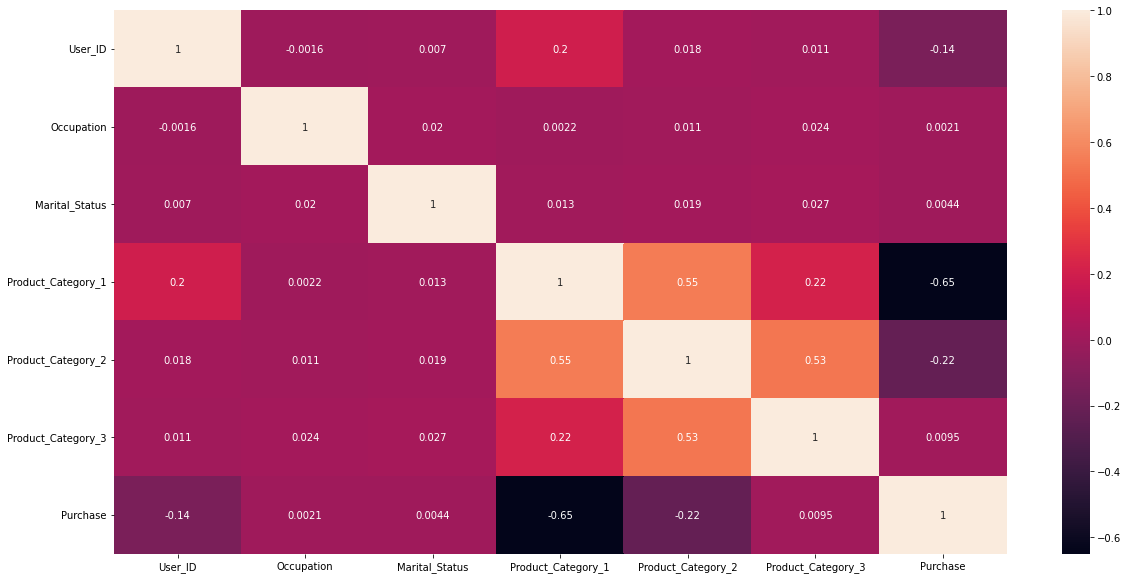

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df_black.corr(), annot=True)

In [19]:
df_black.columns[0]

'User_ID'

In [18]:
for i in df_black.columns:
  print(df_black[i].value_counts())

1001680    72
1001941    71
1000889    66
1001181    64
1002909    58
           ..
1003524     1
1003525     1
1003527     1
1003528     1
1006033     1
Name: User_ID, Length: 4934, dtype: int64
P00371644    899
P00372445    837
P00370853    818
P00375436    814
P00370293    785
            ... 
P00025842      1
P00192742      1
P00347242      1
P00244642      1
P00212342      1
Name: Product_ID, Length: 2638, dtype: int64
M    17035
F     5859
Name: Gender, dtype: int64
26-35    8632
36-45    4610
18-25    4257
46-50    1874
51-55    1667
55+      1046
0-17      808
Name: Age, dtype: int64
4     3176
0     2867
7     2404
1     1869
17    1588
20    1505
12    1392
14    1122
16     978
2      939
3      795
10     691
6      680
11     576
5      479
15     460
19     433
13     394
9      292
18     219
8       35
Name: Occupation, dtype: int64
B    9072
C    7985
A    5837
Name: City_Category, dtype: int64
1     8134
2     4291
3     4024
4+    3626
0     2819
Name: Stay_In_Curren

In [30]:
df_black['Stay_In_Current_City_Years'].replace(to_replace='4+',value='4',inplace=True)
df_black['City_Category'].replace(to_replace=['A','B','C'],value=[0,1,2],inplace=True)
df_black['Gender'].replace(to_replace=['F','M'],value=[0,1],inplace=True)
df_black['Stay_In_Current_City_Years'] = df_black['Stay_In_Current_City_Years'].astype('int64')
df_black['City_Category'] = df_black['City_Category'].astype('int64')
df_black['Gender'] = df_black['Gender'].astype('int64')


In [31]:
# check null using missingno library 
## installing the missing number library

In [32]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#importing the library
import missingno as msno

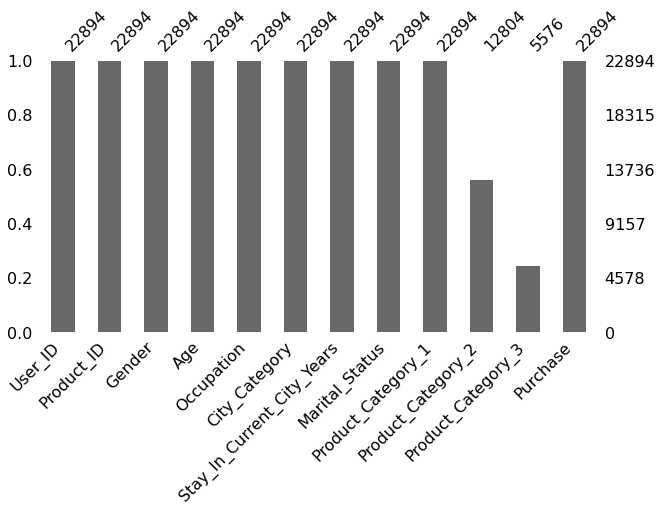

In [34]:
# explore missing values by bar in missingno library
msno.bar(df_black, figsize=(10,5) ,color='dimgray')

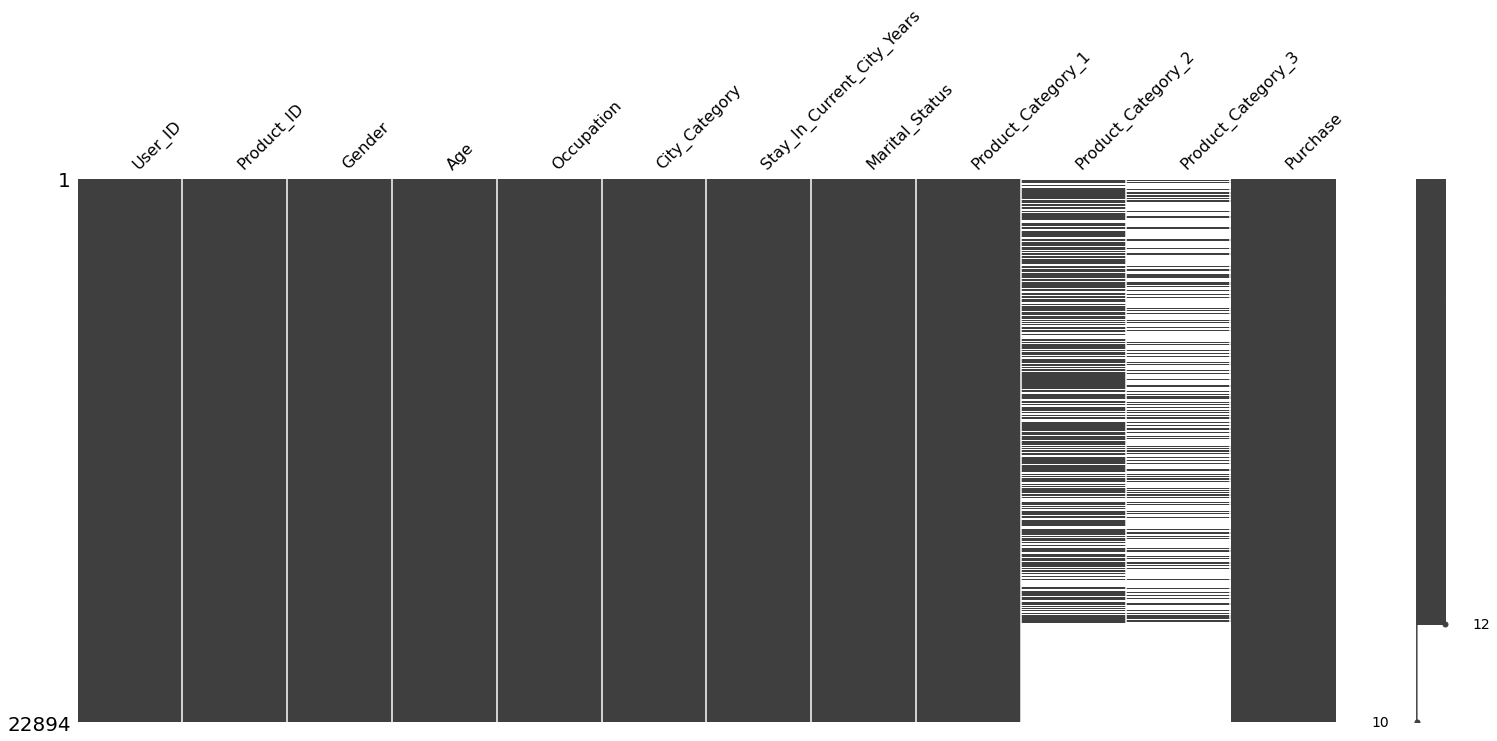

In [26]:
# explore missing values by matrix in missingno library
msno.matrix(df_black)

In [35]:
# handle missing values by KNN 
## importing KNN imputer
from sklearn.impute import KNNImputer

In [37]:
df_black.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [38]:
# I specify the nearest neighbor to be 5
fea_transformer = KNNImputer(n_neighbors=5)
knn_imputer = fea_transformer.fit_transform(df_black[['Product_Category_2', 'Product_Category_3']])
knn_imputer

array([[ 9.82357076, 12.70373027],
       [ 6.        , 14.        ],
       [ 9.82357076, 12.70373027],
       ...,
       [ 9.82357076, 12.70373027],
       [ 9.82357076, 12.70373027],
       [ 9.82357076, 12.70373027]])

In [39]:
df_knn= pd.DataFrame(knn_imputer,columns=['Product_Category_2', 'Product_Category_3'] )
df_knn

,Product_Category_2,Product_Category_3
0,9.823571,12.70373
1,6.000000,14.00000
2,9.823571,12.70373
3,14.000000,16.20000
4,9.823571,12.70373
...,...,...
22889,9.823571,12.70373
22890,9.823571,12.70373
22891,9.823571,12.70373
22892,9.823571,12.70373


In [47]:
df_black['Product_Category_2'] = df_knn['Product_Category_2']


In [48]:
df_black['Product_Category_3'] = df_knn['Product_Category_3']


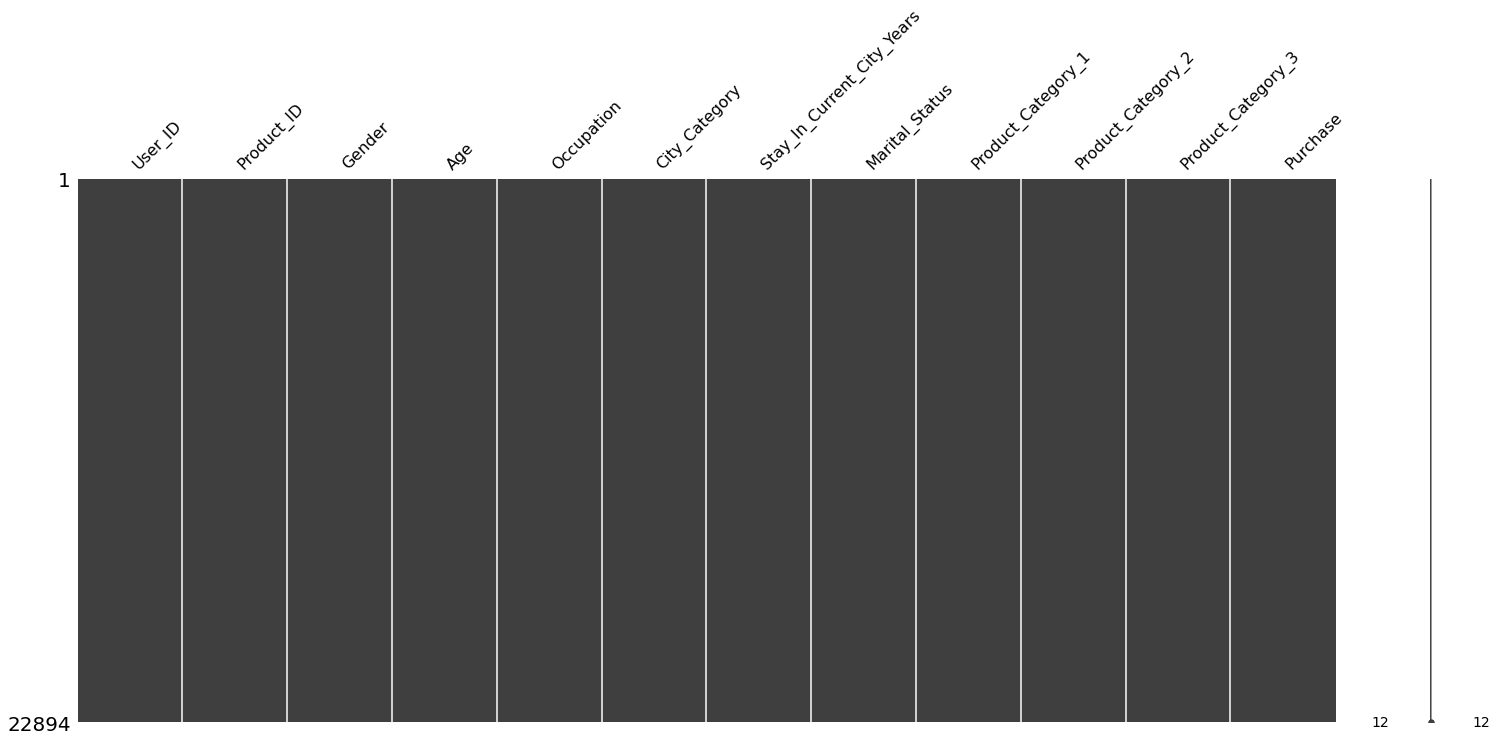

In [49]:
msno.matrix(df_black)

In [51]:
df_black[df_black.Product_ID == "P00371644"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
18749,1000011,P00371644,0,26-35,1,2,1,0,20,9.823571,12.70373,121
18753,1000018,P00371644,0,18-25,3,1,3,0,20,9.823571,12.70373,372
18760,1000030,P00371644,0,36-45,7,2,3,0,20,9.823571,12.70373,599
18769,1000046,P00371644,1,18-25,19,2,4,0,20,9.823571,12.70373,362
18770,1000048,P00371644,1,26-35,4,1,3,1,20,9.823571,12.70373,593
...,...,...,...,...,...,...,...,...,...,...,...,...
22874,1006010,P00371644,1,36-45,0,2,1,0,20,9.823571,12.70373,591
22876,1006012,P00371644,1,36-45,15,2,4,1,20,9.823571,12.70373,368
22879,1006017,P00371644,0,36-45,7,1,1,0,20,9.823571,12.70373,371
22886,1006026,P00371644,1,36-45,6,2,1,1,20,9.823571,12.70373,494


In [59]:
y = df_black["Purchase"]
y

0         8370
1        15200
2         1422
3         1057
4         7969
         ...  
22889      368
22890      371
22891      137
22892      365
22893      490
Name: Purchase, Length: 22894, dtype: int64

In [60]:
X = df_black.drop(['Product_ID', 'User_ID', 'Purchase', 'Age'], axis = 1).values
X


array([[ 0.        , 10.        ,  0.        , ...,  3.        ,
         9.82357076, 12.70373027],
       [ 0.        , 10.        ,  0.        , ...,  1.        ,
         6.        , 14.        ],
       [ 0.        , 10.        ,  0.        , ..., 12.        ,
         9.82357076, 12.70373027],
       ...,
       [ 0.        , 15.        ,  1.        , ..., 20.        ,
         9.82357076, 12.70373027],
       [ 0.        ,  1.        ,  2.        , ..., 20.        ,
         9.82357076, 12.70373027],
       [ 0.        ,  0.        ,  1.        , ..., 20.        ,
         9.82357076, 12.70373027]])

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[0.        , 0.5       , 0.        , ..., 0.10526316, 0.48897317,
        0.64691535],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.25      ,
        0.73333333],
       [0.        , 0.5       , 0.        , ..., 0.57894737, 0.48897317,
        0.64691535],
       ...,
       [0.        , 0.75      , 0.5       , ..., 1.        , 0.48897317,
        0.64691535],
       [0.        , 0.05      , 1.        , ..., 1.        , 0.48897317,
        0.64691535],
       [0.        , 0.        , 0.5       , ..., 1.        , 0.48897317,
        0.64691535]])

In [62]:
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
y_scaled


array([[0.34929789],
       [0.63473755],
       [0.05892678],
       ...,
       [0.00522401],
       [0.01475259],
       [0.0199766 ]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [66]:
reg.coef_


array([[ 0.01974876,  0.00089402,  0.01775353,  0.00463794,  0.00355136,
        -0.44219234, -0.04532395,  0.06368472]])

In [67]:
reg.intercept_


array([0.42681189])

In [70]:
y_pred = reg.predict(X_test)
y_pred

array([[0.32604251],
       [0.30873741],
       [0.39613706],
       ...,
       [0.04662903],
       [0.28409484],
       [0.4111498 ]])

In [71]:
k = X_test.shape[1]
n = len(X_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

print('- Mean Absolute Error(MAE) of Simple Linear regression :' , '\033[1m', metrics.mean_absolute_error(y_test, y_pred),"\033[0m \n")

print('- Mean Squared Error(MSE) of SLR :', '\033[1m', metrics.mean_squared_error(y_test, y_pred),"\033[0m \n")

print('- Root Mean Squared Error (RMSE) of SLR :', '\033[1m', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),"\033[0m \n")

print('- Explained Variance Score (EVS) of SLR :', '\033[1m', explained_variance_score(y_test, y_pred),"\033[0m \n")

print('- R2 of SLR :', '\033[1m', metrics.r2_score(y_test, y_pred),"\033[0m \n")

print('- R2 rounded of SLR :', '\033[1m', (metrics.r2_score(y_test, y_pred)).round(2),"\033[0m \n")

r2 = r2_score(y_pred,y_test)
r2_rounded = r2_score(y_pred,y_test).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('- Adjusted_r2 of SLR : ', '\033[1m', (1- (1-r2)*(n-1)/(n-k-1)).round(3),"\033[0m \n")

accuracy = reg.score(X_test, y_test)
print("- Accuracy of SLR : '\033[1m' {} ".format(accuracy),"\033[0m \n")

- Mean Absolute Error(MAE) of Simple Linear regression :  0.12463143063559648  

- Mean Squared Error(MSE) of SLR :  0.03134109692124799  

- Root Mean Squared Error (RMSE) of SLR :  0.1770341687958796  

- Explained Variance Score (EVS) of SLR :  0.43759660520999544  

- R2 of SLR :  0.4374389114044538  

- R2 rounded of SLR :  0.44  

- Adjusted_r2 of SLR :   -0.323  

- Accuracy of SLR : '' 0.4374389114044538   



In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(25, input_dim=5, activation='relu'))
ann.add(Dense(25, activation='relu'))
ann.add(Dense(1, activation='linear'))
ann.summary()


0.03134109692124799
0.1770341687958796
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________
